In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Online_Retail.csv', encoding='latin1')

df = df[~df['InvoiceNo'].str.contains('C', na=False)]
df = df[df['UnitPrice'] >= 0]
df = df[df['Quantity'] >= 1]


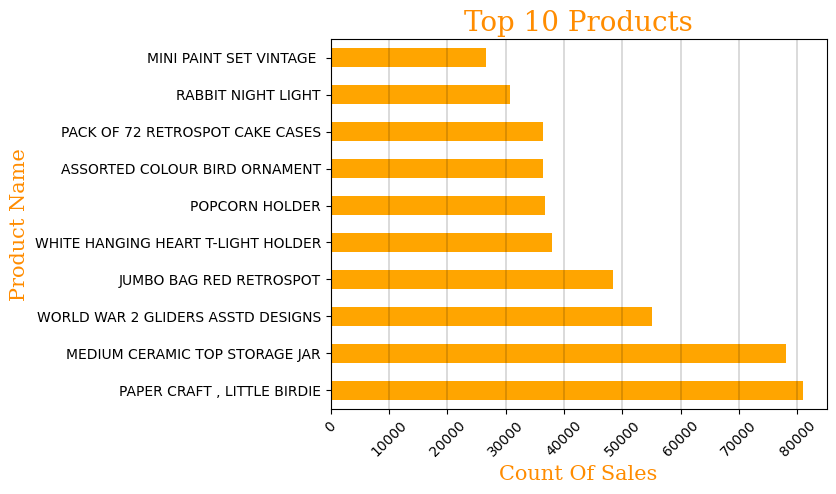

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Top 10 Product sales
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']
top_prod = df.groupby('Description')['Quantity'].sum()
top_prod = top_prod.sort_values(ascending=False)
top_10_prod = top_prod.head(10)

top_10_prod.plot(kind='barh', color='orange')

font1 = {'family':'serif','color':'darkorange','size':20}
font2 = {'family':'serif','color':'darkorange','size':15}

plt.title('Top 10 Products', fontdict=font1)
plt.xlabel('Count Of Sales', fontdict=font2)
plt.ylabel('Product Name', fontdict=font2)
plt.grid(axis='x', linestyle='-', color='black', linewidth=0.2)
plt.xticks(rotation=45)

plt.show()
plt.figure(figsize=(12,6))

/tmp/ipython-input-2652890596.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


<Figure size 1200x600 with 0 Axes>

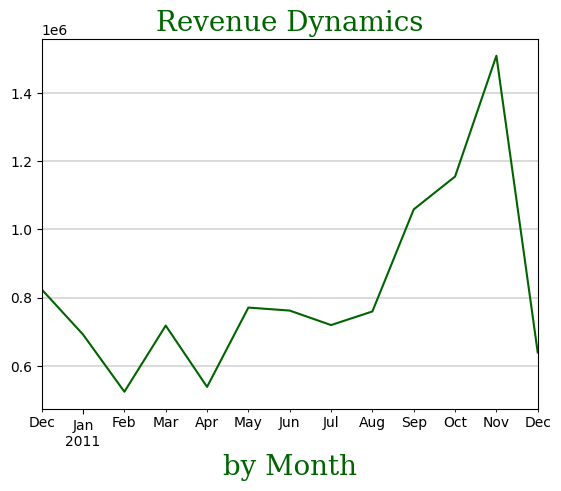

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Revenue Dynamics by Month
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalPrice'].sum().plot(kind='line', linestyle='-', color='darkgreen')
plt.title('Revenue Dynamics', fontdict=font1, color='darkgreen')
plt.xlabel('by Month', fontdict=font1, color='darkgreen')
plt.grid(axis='y', linestyle='-', color='black', linewidth=0.2)
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

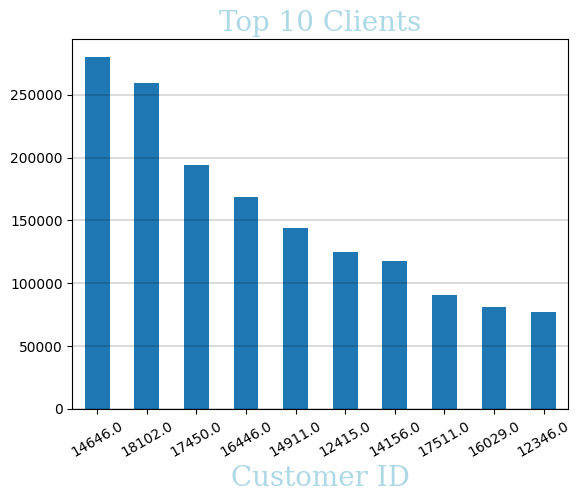

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Top 10 Clients
top_10_clients = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Clients', fontdict=font1, color='lightblue')
plt.xlabel('Customer ID', fontdict=font1, color='lightblue')
plt.grid(axis='y', linestyle='-', color='black', linewidth=0.2)
plt.xticks(rotation=30)
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

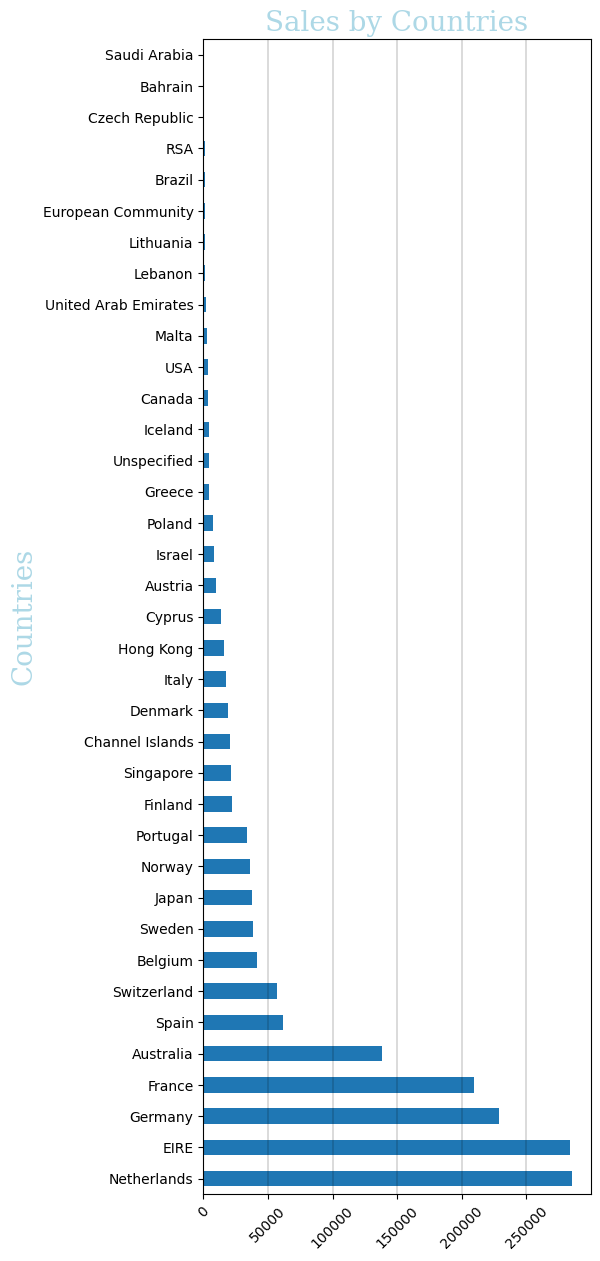

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Sales by Countries
# For better visualisation, UK should be disabled
df_no_uk = df[df['Country'] != 'United Kingdom']
sales_by_countries_no_uk = df_no_uk.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).plot(kind='barh', figsize=(5,15))
plt.title('Sales by Countries', fontdict=font1, color='lightblue')
plt.ylabel('Countries', fontdict=font1, color='lightblue')
plt.grid(axis='x', linestyle='-', color='black', linewidth=0.2)
plt.xticks(rotation=45)
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

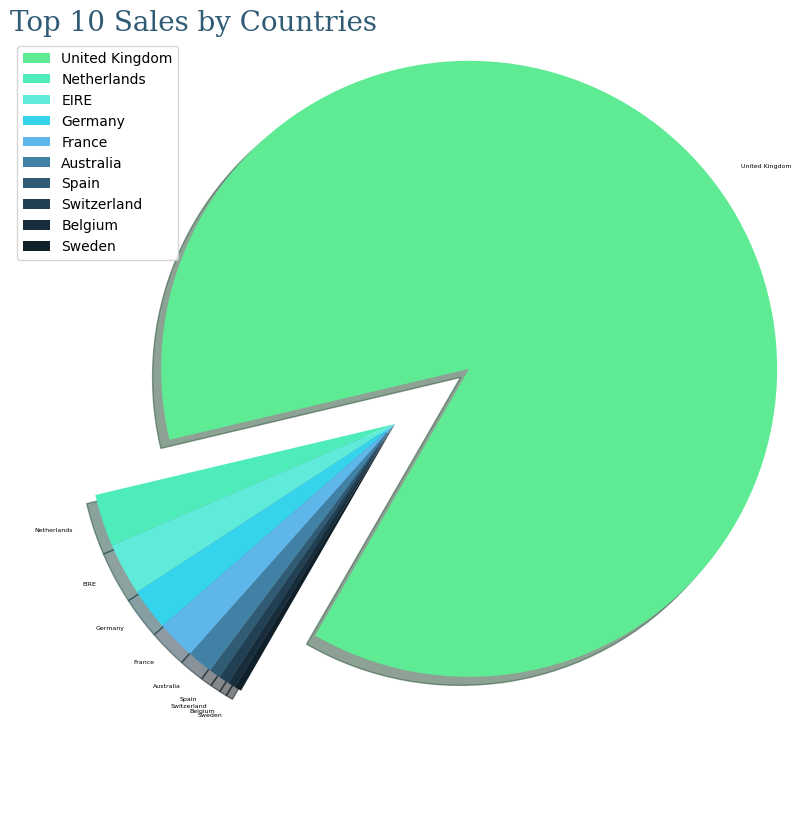

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Top 10 Countries pie chart
ex_s = [0.3,0,0,0,0,0,0,0,0,0]
cols = ['#5eeb93', '#4eecbb', '#5eebd9', '#36d3ed', '#5eb6eb', '#4281a6', '#2f5b75', '#214053', '#172d3b', '#10202a']

Top10_by_countries = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10).plot(kind='pie',
                                                                                                          figsize=(10, 10),
                                                                                                          startangle=240,
                                                                                                          explode=(ex_s),
                                                                                                          shadow=True,
                                                                                                          colors=(cols),
                                                                                                          textprops={'fontsize': 4.5})

plt.title('Top 10 Sales by Countries', fontdict=font1, color='#2f5b75', loc='left')
plt.ylabel(None)
plt.legend()
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

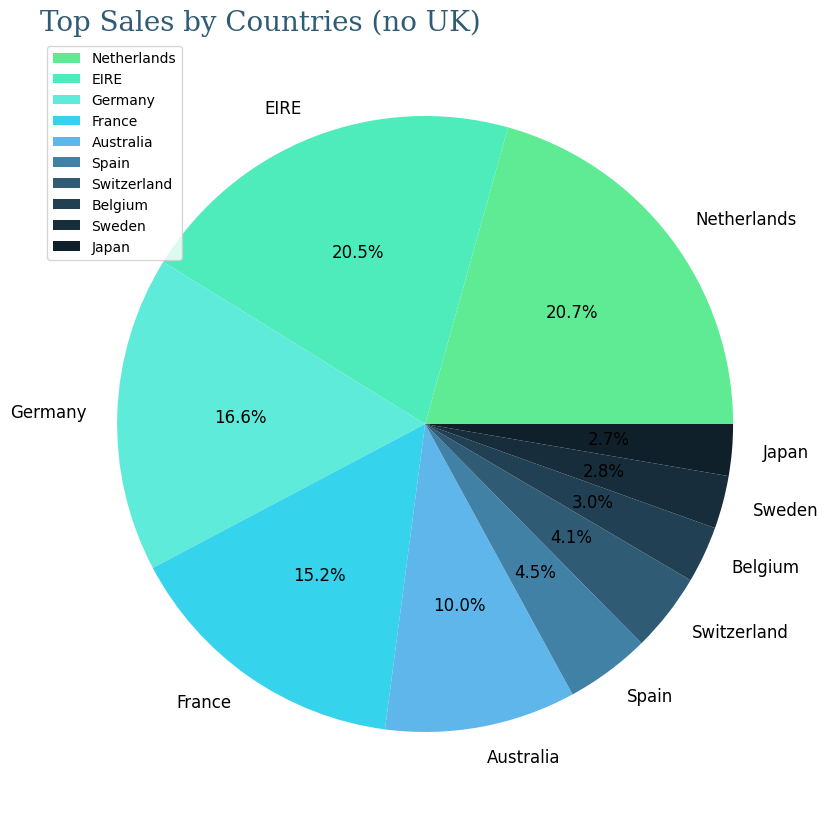

<Figure size 1200x600 with 0 Axes>

In [ ]:
# No UK pie chart
Top10_by_countries = df_no_uk.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10).plot(kind='pie',
                                                                                                          figsize=(10, 10),
                                                                                                          startangle=0,
                                                                                                          colors=(cols),
                                                                                                          autopct='%1.1f%%',
                                                                                                          textprops={'fontsize': 12})
plt.title('Top Sales by Countries (no UK)', fontdict=font1, color='#2f5b75', loc='left')
plt.ylabel(None)
plt.legend()
plt.figure(figsize=(12,6))

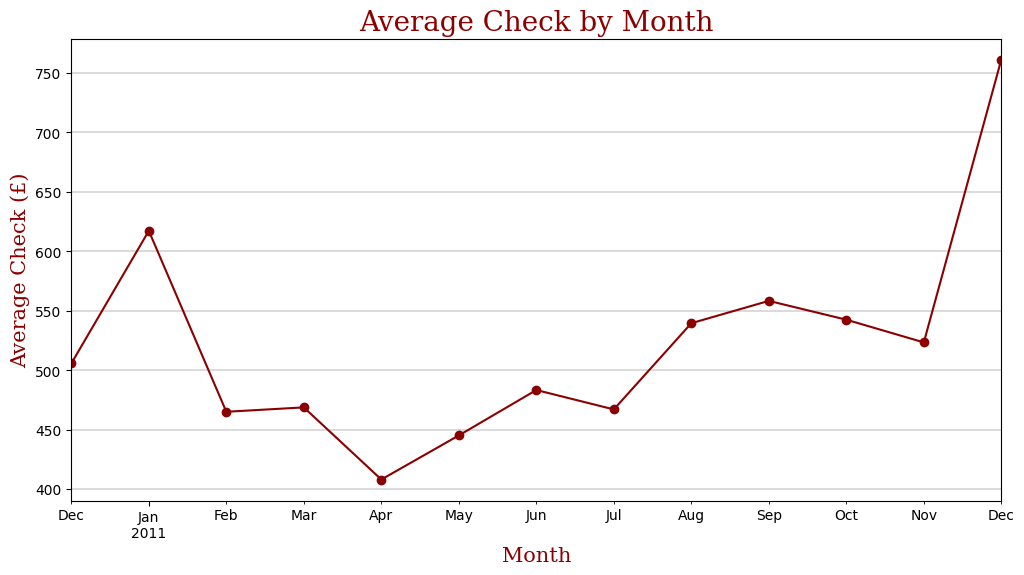

In [ ]:
# Average Check by Month
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')
revenue_by_month = df.groupby('Month')['TotalPrice'].sum()
orders_by_month = df.groupby('Month')['InvoiceNo'].nunique()
avg_check = revenue_by_month / orders_by_month

plt.figure(figsize=(12,6))
avg_check.plot(kind='line', marker='o', color='darkred')

plt.title('Average Check by Month', fontdict=font1, color='darkred')
plt.xlabel('Month', fontdict=font2, color='darkred')
plt.ylabel('Average Check (£)', fontdict=font2, color='darkred')
plt.grid(axis='y', linestyle='-', color='black', linewidth=0.2)


plt.show()